In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\varat\OneDrive\Desktop\Jnotebook proj\parkinsons_data.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
data.columns[data.isna().any()]

Index([], dtype='object')

In [8]:
data[data.duplicated(keep=False)]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [9]:
parkinson_yes = data[data.status ==1]
parkinson_no = data[data.status == 0]

In [10]:
print("samples having parkinson disease",len(parkinson_yes))
print("samples not having parkinson disease",len(parkinson_no))

samples having parkinson disease 147
samples not having parkinson disease 48


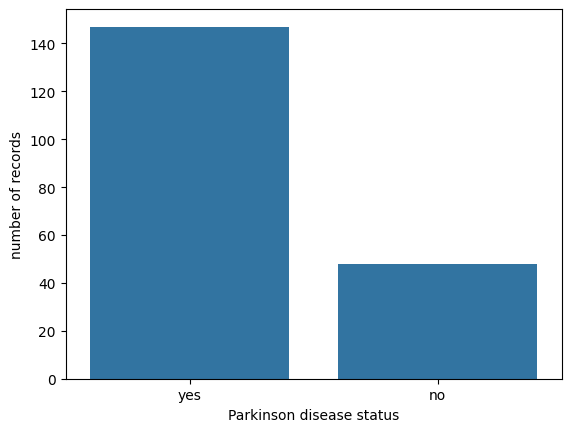

In [25]:
sns.barplot(x = ["yes","no"],y = [len(parkinson_yes),len(parkinson_no)])
plt.ylabel("number of records");
plt.xlabel("Parkinson disease status")
plt.show()

In [12]:
data = data.drop("name",axis = 1)

In [13]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [14]:
data.iloc[:3,:5]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs)
0,119.992,157.302,74.997,0.00784,0.00007
1,122.400,148.650,113.819,0.00968,0.00008
2,116.682,131.111,111.555,0.01050,0.00009


In [15]:
x = data.drop("status",axis = 1)
y = data.status

In [16]:
models = {
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'LogisticRegression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'XGBoost': (XGBClassifier(eval_metric='logloss'), {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    })
}

In [17]:
results = {'Round1': {}, 'Round2': {}, 'Round3': {}}

In [30]:
# -------- ROUND 1: Unscaled, all 22 features --------
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    results['Round1'][name] = {
        'BestParams': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Report': classification_report(y_test, y_pred, output_dict=True)
    }

In [31]:
for model_name, result in results['Round1'].items():
    print(f"Model: {model_name}")
    report_dict = result['Report']
    
    # Convert to DataFrame for neat formatting
    df_report = pd.DataFrame(report_dict).transpose()
    df_report = df_report.round(3)
    print(df_report)
    print("\n" + "-"*50 + "\n")

Model: SVM
              precision  recall  f1-score  support
0                 0.750   0.429     0.545    7.000
1                 0.886   0.969     0.925   32.000
accuracy          0.872   0.872     0.872    0.872
macro avg         0.818   0.699     0.735   39.000
weighted avg      0.861   0.872     0.857   39.000

--------------------------------------------------

Model: LogisticRegression
              precision  recall  f1-score  support
0                 1.000   0.429     0.600    7.000
1                 0.889   1.000     0.941   32.000
accuracy          0.897   0.897     0.897    0.897
macro avg         0.944   0.714     0.771   39.000
weighted avg      0.909   0.897     0.880   39.000

--------------------------------------------------

Model: RandomForest
              precision  recall  f1-score  support
0                 1.000   0.714     0.833    7.000
1                 0.941   1.000     0.970   32.000
accuracy          0.949   0.949     0.949    0.949
macro avg         0.9

In [19]:
# -------- ROUND 2: PCA selected features --------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()
k = (explained_variance < 0.95).sum() + 1
X_pca_reduced = X_pca[:, :k]

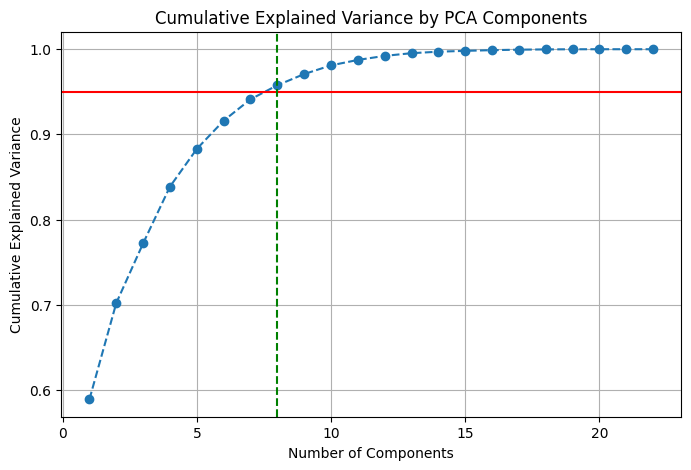

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=k, color='g', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    results['Round2'][name] = {
        'BestParams': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Report': classification_report(y_test, y_pred, output_dict=True)
    }

In [32]:
# -------- ROUND 3: PCA + Scaled + SMOTE --------
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_pca_reduced, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    results['Round3'][name] = {
        'BestParams': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Report': classification_report(y_test, y_pred, output_dict=True)
    }

In [33]:
for model_name, result in results['Round2'].items():
    print(f"Model: {model_name}")
    report_dict = result['Report']
    
    # Convert to DataFrame for neat formatting
    df_report = pd.DataFrame(report_dict).transpose()
    df_report = df_report.round(3)
    print(df_report)
    print("\n" + "-"*50 + "\n")

Model: SVM
              precision  recall  f1-score  support
0                 1.000   0.714     0.833    7.000
1                 0.941   1.000     0.970   32.000
accuracy          0.949   0.949     0.949    0.949
macro avg         0.971   0.857     0.902   39.000
weighted avg      0.952   0.949     0.945   39.000

--------------------------------------------------

Model: LogisticRegression
              precision  recall  f1-score  support
0                 1.000   0.429     0.600    7.000
1                 0.889   1.000     0.941   32.000
accuracy          0.897   0.897     0.897    0.897
macro avg         0.944   0.714     0.771   39.000
weighted avg      0.909   0.897     0.880   39.000

--------------------------------------------------

Model: RandomForest
              precision  recall  f1-score  support
0                 0.833   0.714     0.769    7.000
1                 0.939   0.969     0.954   32.000
accuracy          0.923   0.923     0.923    0.923
macro avg         0.8

In [28]:
parkinson_yes = len(y_resampled==1)
parkinson_no = len(y_resampled==0)
print(parkinson_yes,parkinson_no)

294 294


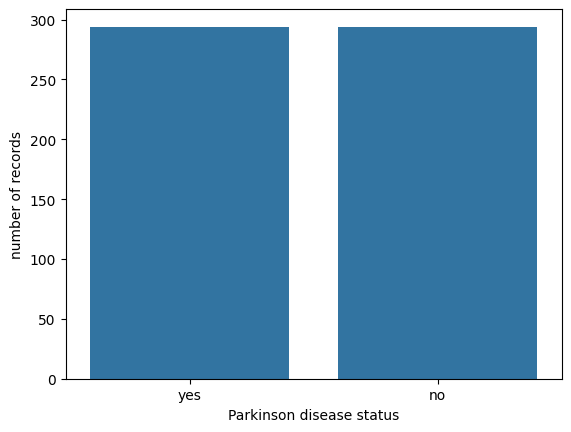

In [29]:
sns.barplot(x = ["yes","no"],y = [parkinson_yes,parkinson_no])
plt.ylabel("number of records");
plt.xlabel("Parkinson disease status")
plt.show()

In [29]:
results

{'Round1': {'SVM': {'BestParams': {'C': 1, 'kernel': 'linear'},
   'Accuracy': 0.8717948717948718,
   'Report': {'0': {'precision': 0.75,
     'recall': 0.42857142857142855,
     'f1-score': 0.5454545454545454,
     'support': 7.0},
    '1': {'precision': 0.8857142857142857,
     'recall': 0.96875,
     'f1-score': 0.9253731343283582,
     'support': 32.0},
    'accuracy': 0.8717948717948718,
    'macro avg': {'precision': 0.8178571428571428,
     'recall': 0.6986607142857143,
     'f1-score': 0.7354138398914518,
     'support': 39.0},
    'weighted avg': {'precision': 0.8613553113553113,
     'recall': 0.8717948717948718,
     'f1-score': 0.8571826183766483,
     'support': 39.0}}},
  'LogisticRegression': {'BestParams': {'C': 10},
   'Accuracy': 0.8974358974358975,
   'Report': {'0': {'precision': 1.0,
     'recall': 0.42857142857142855,
     'f1-score': 0.6,
     'support': 7.0},
    '1': {'precision': 0.8888888888888888,
     'recall': 1.0,
     'f1-score': 0.9411764705882353,
    

In [30]:
def results_to_dataframe(results_dict):
    rows = []
    for round_name, round_data in results_dict.items():
        for model_name, metrics in round_data.items():
            report = metrics['Report']['weighted avg']
            rows.append({
                'Round': round_name,
                'Model': model_name,
                'Accuracy': round(metrics['Accuracy'], 4),
                'Precision': round(report['precision'], 4),
                'Recall': round(report['recall'], 4),
                'F1-Score': round(report['f1-score'], 4),
                'BestParams': metrics['BestParams']
            })

    # Create DataFrame
    df = pd.DataFrame(rows)

    # Sort first by Round, then by Accuracy (desc), then F1-Score (desc)
    df = df.sort_values(by=['Accuracy', 'F1-Score'], ascending=[False, False])
    df.reset_index(drop=True, inplace=True)
    
    return df

In [31]:
results_to_dataframe(results)

,Round,Model,Accuracy,Precision,Recall,F1-Score,BestParams
0,Round3,RandomForest,1.0000,1.0000,1.0000,1.0000,{'n_estimators': 50}
1,Round3,XGBoost,1.0000,1.0000,1.0000,1.0000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est..."
2,Round3,SVM,0.9831,0.9836,0.9831,0.9830,"{'C': 10, 'kernel': 'rbf'}"
3,Round3,KNN,0.9831,0.9836,0.9831,0.9830,{'n_neighbors': 5}
4,Round1,RandomForest,0.9487,0.9517,0.9487,0.9452,{'n_estimators': 100}
5,Round1,XGBoost,0.9487,0.9517,0.9487,0.9452,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."
6,Round2,SVM,0.9487,0.9517,0.9487,0.9452,"{'C': 10, 'kernel': 'rbf'}"
7,Round2,KNN,0.9231,0.9287,0.9231,0.9250,{'n_neighbors': 3}
8,Round2,RandomForest,0.9231,0.9204,0.9231,0.9207,{'n_estimators': 50}
9,Round1,LogisticRegression,0.8974,0.9088,0.8974,0.8799,{'C': 10}
